<a href="https://colab.research.google.com/github/Harlequelrah/Learning_data_science/blob/main/Learning_data_science/Cr%C3%A9ez_des_data_frames_avec_Pandas/Manipulez_le_data_frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np

In [46]:
base_url ='https://raw.githubusercontent.com/Harlequelrah/Learning_data_science/main/Learning_data_science/Cr%C3%A9ez_des_data_frames_avec_Pandas/'
csv_url  = base_url+'clients.csv'
json_url = base_url + 'clients.json'
excel_url = base_url + 'clients.xlsx'
data_json=pd.read_json(json_url)

**Accès et manipulation du data frame**

In [47]:
email = data_json['email'] # assigne les emails des clients
email

,email
0,LaurentDagenais@rhyta.com
1,GuyMarois@fleckens.hu
2,BeaufortLesage@einrot.com
3,RussellDurand@armyspy.com
4,AlexisRiel@rhyta.com
...,...
223,ClaudeDandonneau@jourrapide.com
224,ApollineMichaud@superrito.com
225,PascalineBeaudry@rhyta.com
226,FleurCaouette@jourrapide.com


Les variables sont dans l'ordre spécifiées ce qui permet de réorganiser l'ordre des colonnes à sa guise sans modifier le data frame originale .

In [48]:
variables = ['nom','email'] # listes des variables
data_json[variables] # les resultats des individus correspondant

,nom,email
0,Laurent Dagenais,LaurentDagenais@rhyta.com
1,Guy Marois,GuyMarois@fleckens.hu
2,Beaufort Lesage,BeaufortLesage@einrot.com
3,Russell Durand,RussellDurand@armyspy.com
4,Alexis Riel,AlexisRiel@rhyta.com
...,...,...
223,Claude Dandonneau,ClaudeDandonneau@jourrapide.com
224,Apolline Michaud,ApollineMichaud@superrito.com
225,Pascaline Beaudry,PascalineBeaudry@rhyta.com
226,Fleur Caouette,FleurCaouette@jourrapide.com


Les colonnes d'un data frame sont des types series , plus exactement pandas.core.series.Series .

un data frame a 2 dimensions avec plusieurs colonnes, alors que la Series n’a qu’une seule dimension.


**Exemple d'affichage data frame** :

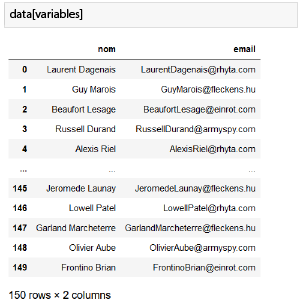

**Exemple d'affichage series** :

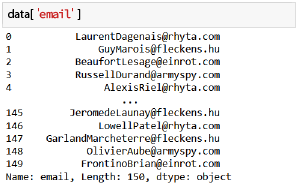

*shape , tail , dtypes et head sont aussi disponibles sur les Series .*

**quelques manipulations indispensables sur les data frames** :

- créer ou supprimer une colonne ;

- renommer une colonne ;

- changer le type d’une colonne ;

- trier un data frame selon une ou plusieurs colonnes.

**Modifier une colonne existante**

Dans l'exemple ci-après modifier assigner une valeur fixe aura pour conséquence de modifier l'ensemble des valeurs et le types de la colonne qui passe en int .

In [49]:
display(data_json['nom'])
data_json['nom']=1
data_json['nom'] # le nom de la Series ne semble plus apparaître dans la version actuelle


,nom
0,Laurent Dagenais
1,Guy Marois
2,Beaufort Lesage
3,Russell Durand
4,Alexis Riel
...,...
223,Claude Dandonneau
224,Apolline Michaud
225,Pascaline Beaudry
226,Fleur Caouette


,nom
0,1
1,1
2,1
3,1
4,1
...,...
223,1
224,1
225,1
226,1


Une Series peut être remplacé par un objet de même dimension , c'est à dire :

- une liste

- un array

- une series

Les objets cités comprenant exactement le même nombre d'élément que la series

In [50]:
data_json['identifiant'] = data_json['identifiant'] * 100
data_json['identifiant'].head()

,identifiant
0,0
1,100
2,200
3,300
4,400


In [51]:
data_json['identifiant']= np.random.randint(1,1000,data_json['identifiant'].shape[0])
data_json['identifiant'].head()

,identifiant
0,982
1,977
2,22
3,358
4,144


**Créer et supprimer une colonne**

In [52]:
data_json['id']=data_json['identifiant']+100
data_json.head()

,identifiant,email,nom,genre,id
0,982,LaurentDagenais@rhyta.com,1,M,1082
1,977,GuyMarois@fleckens.hu,1,M,1077
2,22,BeaufortLesage@einrot.com,1,M,122
3,358,RussellDurand@armyspy.com,1,M,458
4,144,AlexisRiel@rhyta.com,1,M,244


Supprimer une colonne

- drop : effectue la suppression sans modifier le data frame existant donc on doit assigner

- del

- pop

In [53]:
data_1 = data_json.drop(columns='id') #
data_1.head()

,identifiant,email,nom,genre
0,982,LaurentDagenais@rhyta.com,1,M
1,977,GuyMarois@fleckens.hu,1,M
2,22,BeaufortLesage@einrot.com,1,M
3,358,RussellDurand@armyspy.com,1,M
4,144,AlexisRiel@rhyta.com,1,M


In [54]:
del data_json['id']
data_json.head()

,identifiant,email,nom,genre
0,982,LaurentDagenais@rhyta.com,1,M
1,977,GuyMarois@fleckens.hu,1,M
2,22,BeaufortLesage@einrot.com,1,M
3,358,RussellDurand@armyspy.com,1,M
4,144,AlexisRiel@rhyta.com,1,M


In [55]:
data_json['test']='hello'
display(data_json['test'].head())
data_json.pop('test')
data_json.head()

,test
0,hello
1,hello
2,hello
3,hello
4,hello


,identifiant,email,nom,genre
0,982,LaurentDagenais@rhyta.com,1,M
1,977,GuyMarois@fleckens.hu,1,M
2,22,BeaufortLesage@einrot.com,1,M
3,358,RussellDurand@armyspy.com,1,M
4,144,AlexisRiel@rhyta.com,1,M


**Renommez une colonne**

In [56]:
data_json=data_json.rename(columns={'identifiant':'id'})
data_json.head()

,id,email,nom,genre
0,982,LaurentDagenais@rhyta.com,1,M
1,977,GuyMarois@fleckens.hu,1,M
2,22,BeaufortLesage@einrot.com,1,M
3,358,RussellDurand@armyspy.com,1,M
4,144,AlexisRiel@rhyta.com,1,M


Avec l'argument inplace à True , le data frame existant peut être directement modifié sans affectation .

In [57]:
data_json.rename(columns={'nom':'name','email':'mail'},inplace=True)
data_json.head()

,id,mail,name,genre
0,982,LaurentDagenais@rhyta.com,1,M
1,977,GuyMarois@fleckens.hu,1,M
2,22,BeaufortLesage@einrot.com,1,M
3,358,RussellDurand@armyspy.com,1,M
4,144,AlexisRiel@rhyta.com,1,M


*Changer le type d'une colonne avec astype*


In [58]:
data_json['name']=data_json['name'].astype(float)
data_json

,id,mail,name,genre
0,982,LaurentDagenais@rhyta.com,1.0,M
1,977,GuyMarois@fleckens.hu,1.0,M
2,22,BeaufortLesage@einrot.com,1.0,M
3,358,RussellDurand@armyspy.com,1.0,M
4,144,AlexisRiel@rhyta.com,1.0,M
...,...,...,...,...
223,833,ClaudeDandonneau@jourrapide.com,1.0,F
224,804,ApollineMichaud@superrito.com,1.0,F
225,821,PascalineBeaudry@rhyta.com,1.0,F
226,835,FleurCaouette@jourrapide.com,1.0,F


**Trier un data frame**

In [59]:
data_json.sort_values('id').head() # trie selon id  par ordre croissant

,id,mail,name,genre
135,1,AdelaideBrousse@gustr.com,1.0,F
11,7,FlorusDevoe@einrot.com,1.0,M
217,9,GanoHetu@fleckens.hu,1.0,M
59,13,DidianeDAubigne@einrot.com,1.0,F
36,14,AlphonsePotvin@armyspy.com,1.0,M


In [60]:
data_json.sort_values('id',ascending=False).head() # avec ascending=False trie selon id par ordre décroissant

,id,mail,name,genre
124,999,SacripantLabrie@armyspy.com,1.0,M
216,998,ChappellSarrazin@rhyta.com,1.0,M
22,997,FranckDumont@gustr.com,1.0,M
0,982,LaurentDagenais@rhyta.com,1.0,M
42,979,GermainHughes@teleworm.us,1.0,M


In [61]:
data_json.sort_values(['id','genre']).head() # trie selon id et genre par ordre croissant tous les deux

,id,mail,name,genre
135,1,AdelaideBrousse@gustr.com,1.0,F
11,7,FlorusDevoe@einrot.com,1.0,M
217,9,GanoHetu@fleckens.hu,1.0,M
59,13,DidianeDAubigne@einrot.com,1.0,F
36,14,AlphonsePotvin@armyspy.com,1.0,M


In [62]:
data_json.sort_values(['id','genre'],ascending=[False,True]).head() # trie selon id par ordre décroissant et genre par ordre croissant

,id,mail,name,genre
124,999,SacripantLabrie@armyspy.com,1.0,M
216,998,ChappellSarrazin@rhyta.com,1.0,M
22,997,FranckDumont@gustr.com,1.0,M
0,982,LaurentDagenais@rhyta.com,1.0,M
42,979,GermainHughes@teleworm.us,1.0,M
